Q:哪些因素会影响船员的生还率？

In [1]:
import unicodecsv         #创建读取数据的函数

def read_csv(filename):
    with open(filename,'rb') as f:
        reader=unicodecsv.DictReader(f)
        return list(reader)

In [2]:
titanic_data=read_csv(r'C:\Users\linshoubao\Downloads\P2\titanic-data.csv')  #导入数据到titanic_data中

In [3]:
titanic_data[0]   #确认数据是否导入

{u'Age': u'22',
 u'Cabin': u'',
 u'Embarked': u'S',
 u'Fare': u'7.25',
 u'Name': u'Braund, Mr. Owen Harris',
 u'Parch': u'0',
 u'PassengerId': u'1',
 u'Pclass': u'3',
 u'Sex': u'male',
 u'SibSp': u'1',
 u'Survived': u'0',
 u'Ticket': u'A/5 21171'}

In [4]:
len(titanic_data)  #查看数据数目

891

In [5]:
for titanic_record in titanic_data:             #修改用到的数据类型
    titanic_record['Survived']=int(titanic_record['Survived'])

Q1：性别是不是影响生还率的因素？

In [6]:
num_female=0  #统计女性人数
num_male=0  #统计男性人数
for sex in titanic_data:
    if sex['Sex']=='female':
        num_female +=1
    else:
        num_male +=1

In [7]:
print  '船上女性：%s 人,男性：%s 人' % (num_female,num_male)  

船上女性：314 人,男性：577 人


我们可以将上面的数据绘成图

In [8]:
import pandas as pd   #导入pandas和numpy包
import numpy as np

In [9]:
titanic_data_frame=pd.DataFrame(titanic_data) #将数据转换成数据框格式，赋值到titanic_data_frame中

In [10]:
titanic_data_frame.head()   #导出前5行的数据，确认是否转换成功

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26,,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35,,S,8.05,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [11]:
# 导入绘图用的包
%pylab inline      
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


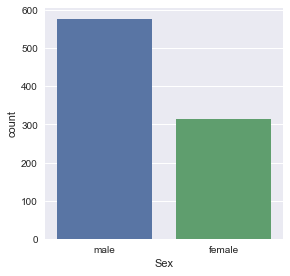

In [12]:
sns.factorplot('Sex',data=titanic_data_frame,kind='count')   #利用针对数据框数据的绘图函数

同时利用上面方法绘出男性、女性中是否生还的情况

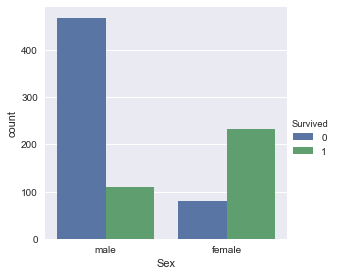

In [13]:
sns.factorplot('Sex',data=titanic_data_frame,hue='Survived',kind='count') 

从图中我们可以看出男性死亡人数远远超过了女性死亡人数，我们可以确定男性的死亡率高，女性的生还率高，下面计算确切的数据

In [14]:
sex_survived_data=titanic_data_frame.groupby(['Sex','Survived'],as_index=False).count()   #通过'Sex','Survived'进行分组，并进行计数统计

In [15]:
sex_survived_data   #因为是计数统计，因此表中的数据都是一致的，下面将利用‘Age’列中的数据进行计算

,Sex,Survived,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,SibSp,Ticket
0,female,0,81,81,81,81,81,81,81,81,81,81
1,female,1,233,233,233,233,233,233,233,233,233,233
2,male,0,468,468,468,468,468,468,468,468,468,468
3,male,1,109,109,109,109,109,109,109,109,109,109


In [16]:
from __future__ import division    #导入类__future__进行小数计算
print '女性 死亡率:'
print sex_survived_data.iloc[0,2]/(sex_survived_data.iloc[0,2]+sex_survived_data.iloc[1,2])
print '女性 生还率:' 
print sex_survived_data.iloc[1,2]/(sex_survived_data.iloc[0,2]+sex_survived_data.iloc[1,2])
print '男性 死亡率:' 
print sex_survived_data.iloc[2,2]/(sex_survived_data.iloc[2,2]+sex_survived_data.iloc[3,2])
print '男性 生还率:' 
print sex_survived_data.iloc[3,2]/(sex_survived_data.iloc[2,2]+sex_survived_data.iloc[3,2])

女性 死亡率:
0.257961783439
女性 生还率:
0.742038216561
男性 死亡率:
0.811091854419
男性 生还率:
0.188908145581


通过分别计算女性、男性的死亡率、生还率，可以看出男性的死亡率明显高于女性，相反女性的生还率明显高于男性，这可能是由于当时的救人策略：女性优先于男性，登上逃生船。

Q2：:船舱的等级是否会影响生还率？

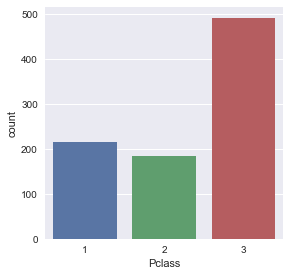

In [17]:
sns.factorplot('Pclass',data=titanic_data_frame,kind='count')  #绘出不同等级船舱的人数

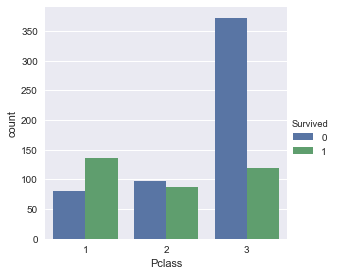

In [18]:
sns.factorplot('Pclass',data=titanic_data_frame,hue='Survived',kind='count')  #绘出不同等级船舱人员的死亡、生还情况

从图中可以看出，三等舱死亡人数最多，下面计算不同舱等的死亡率、生还率。

In [19]:
def survived_and_died_rate(data):                       #创建survived_and_died_rate函数，利用titanic_data数据进行死亡率、生还率计算
    data_survived=[]
    data_died=[]
    for data_record in data:
        if data_record['Survived']==0:
            data_died.append(data_record)
        else:
            data_survived.append(data_record)
    return  len(data_survived)/len(data),len(data_died)/len(data)

In [20]:
first_class=[]   #一等舱
second_class=[]  #二等舱
third_class=[]   #三等舱
for class_record in titanic_data:
    if class_record['Pclass']=='1':
        first_class.append(class_record)
    elif class_record['Pclass']=='2':
        second_class.append(class_record)
    else:
        third_class.append(class_record)
len(first_class),len(second_class),len(third_class)

(216, 184, 491)

In [21]:
print '一等舱生还率：%s,一等舱死亡率：%s' %(survived_and_died_rate(first_class))
print '二等舱生还率：%s,二等舱死亡率：%s' %(survived_and_died_rate(second_class))
print '三等舱生还率：%s,三等舱死亡率：%s' %(survived_and_died_rate(third_class))

一等舱生还率：0.62962962963,一等舱死亡率：0.37037037037
二等舱生还率：0.472826086957,二等舱死亡率：0.527173913043
三等舱生还率：0.242362525458,三等舱死亡率：0.757637474542


从上面数据中可以看出，一等舱的生还率最高，三等舱的死亡率最高，可能原因是：三等舱人员多，船舱位置靠内、靠下，逃生难度大，
而一等舱人员少，船舱位置靠上利于逃生。

Q3:出发港口会不会影响生还率？

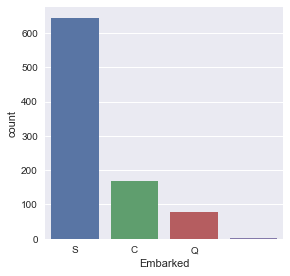

In [22]:
sns.factorplot('Embarked',data=titanic_data_frame,kind='count') # 绘制不同港口出发的人员情况

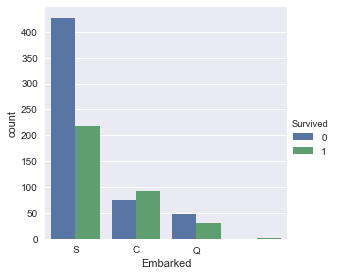

In [23]:
sns.factorplot('Embarked',data=titanic_data_frame,hue='Survived',kind='count')  #绘制不同港口出发人员的死亡、生还情况

从上图可以看出从Southampton港口出发的人员中死亡人员最多，下面计算不同港口的死亡率、生还率

In [24]:
Cherbourg=[]   #C港口
Queenstown=[]  #Q港口
Southampton=[] #S港口
for embarked_record in titanic_data:
    if embarked_record['Embarked']=='S':
        Southampton.append(embarked_record)
    elif embarked_record['Embarked']=='Q':
        Queenstown.append(embarked_record)
    else:
        Cherbourg.append(embarked_record)

In [25]:
print 'C港口存活率：%s,C港口死亡率：%s' %(survived_and_died_rate(Cherbourg))
print 'Q港口存活率：%s,Q港口死亡率：%s' %(survived_and_died_rate(Queenstown))
print 'S港口存活率：%s,S港口死亡率：%s' %(survived_and_died_rate(Southampton))

C港口存活率：0.558823529412,C港口死亡率：0.441176470588
Q港口存活率：0.38961038961,Q港口死亡率：0.61038961039
S港口存活率：0.336956521739,S港口死亡率：0.663043478261


除了出发港为Cherbourg的生还率高，其他港口生还率较低，同时不同港口出发的人员数量相差太大，因此出发港口是否是影响生还率的因素有待商榷。

Q4：年龄是不是影响生还率的因素？

In [26]:
titanic_data_frame[0:6]  #显示6条数据

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26,,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35,,S,8.05,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,,,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877


从上面数据表中看出，数据列'Age','Cabin'中存在着缺省值，我们可以采取dropna()方法进行删除缺省值，但是这个方法有一个缺点，就是无法根据列来删除缺省值，因此我们打算从titanic_data中删除缺省值，再转换成dataframe。

In [27]:
titanic_data_has_age=[]  
for age_record in titanic_data:
    if age_record['Age']!='':
        titanic_data_has_age.append(age_record)
len(titanic_data_has_age)   

714

In [28]:
for titanic_data_record in titanic_data_has_age:             #修改'Age'中的数据类型
    titanic_data_record['Age']=int(float(titanic_data_record['Age']))

In [29]:
titanic_data_frame_has_age=pd.DataFrame(titanic_data_has_age)  #将修改后的新数据转换成数据框格式

In [30]:
titanic_data_frame_has_age[0:6] #确认是否成功删除缺省值

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26,,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35,,S,8.05,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,54,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463


下一步，我们将根据年龄大小划分为三个不同的年龄段，分别为child、youth、old。

In [31]:
def child_youth_old(age):            #创建函数进行年龄段划分
    if age<=18:         #18岁以下为儿童
        return 'child'
    elif age<=40:        #18-40岁为青年
        return 'youth'
    else:               #40以上为老年
        return 'old'

In [32]:
titanic_data_frame_has_age['Person']=titanic_data_frame_has_age['Age'].apply(child_youth_old)    #创建新列‘Person’，并通过apply方法赋值

In [33]:
titanic_data_frame_has_age[0:6]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Person
0,22,,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,youth
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,youth
2,26,,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,youth
3,35,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,youth
4,35,,S,8.05,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,youth
5,54,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463,old


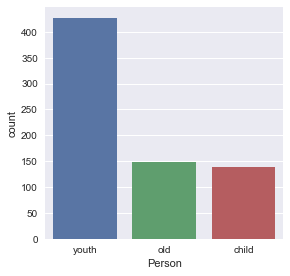

In [34]:
sns.factorplot('Person',data=titanic_data_frame_has_age,kind='count')  #绘出不同年龄段的人数情况

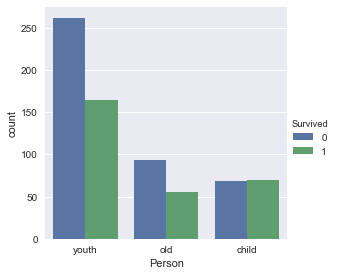

In [35]:
sns.factorplot('Person',data=titanic_data_frame_has_age,hue='Survived',kind='count')  #不同年龄段的生还、死亡情况

从上图中可以看出，儿童中死亡和生还各占到一半，下面计算他们各自的生还率和死亡率。

In [36]:
child=[] #儿童
youth =[] #青年
old_man=[] #老年
for age_record in titanic_data_has_age:
    if age_record['Age']<=18:  
        child.append(age_record)
    elif age_record['Age']<=40: 
        youth.append(age_record)
    else:
        old_man.append(age_record)        

In [37]:
print '儿童生还率：%s,儿童死亡率：%s' %(survived_and_died_rate(child))
print '青年生还率：%s,青年死亡率：%s' %(survived_and_died_rate(youth))
print '老年生还率：%s,老年死亡率：%s' %(survived_and_died_rate(old_man))

儿童生还率：0.503597122302,儿童死亡率：0.496402877698
青年生还率：0.385922330097,青年死亡率：0.614077669903
老年生还率：0.374233128834,老年死亡率：0.625766871166


从上面数据可以看出，儿童的生还率最高，可能原因是儿童会优先被救助，登上逃生船。

 **Conclusion:**
针对提出的问题：哪些因素影响生还率？我们从性别、年龄、船舱等级、出发港口四个方面进行了分析，分别得出四个结果：一是女性生还率高于男性；二是儿童的生还率高于其他年龄段；三是一等舱的生还率高于其他级别的船舱；四是Cherbourg出发的港口生还率高于其他港口。但是上述整个分析过程中，计算不同因素的生还率、死亡率时，基数各不相同，计算出来的生还率、死亡率进行比较时，得出的结果缺乏一定的说服力。比如Cherbourg出发港口的人数远超过其他两个港口之和。通过这次分析，我们暂且得到结论是：性别、年龄、船舱等级影响着船员的生还率。